### Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs I create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define Path
path = r'C:\Users\Leeza\Desktop\Data Analytics\Data Immersion\6. Advanced analytics and dashboard Designs\Balanced flight cancellation and delay - 2019-2023'

In [4]:
# Reading Data
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'flight_info_clean.pkl'))

### Data Cleaning and wrangling

In [5]:
df.head()

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,DELAY_DUE_WEATHER,latitude,longitude
0,2019-12-06,United Air Lines Inc.,729,DFW,ORD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,801.0,0.0,32.896519,-97.046524
1,2019-12-06,United Air Lines Inc.,586,ORD,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,801.0,0.0,41.978081,-87.909180
2,2019-12-06,United Air Lines Inc.,362,HNL,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,4962.0,0.0,21.320404,-157.917313
3,2019-12-06,United Air Lines Inc.,211,ORD,SFO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,1846.0,0.0,41.978081,-87.909180
4,2019-12-04,United Air Lines Inc.,240,EWR,LAX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,2454.0,0.0,40.689064,-74.177254


In [6]:
df.shape

(1551842, 20)

In [7]:
#Checking missing values
df.isnull().sum()

FL_DATE              0
AIRLINE              0
FL_NUMBER            0
ORIGIN               0
DEST                 0
DEP_TIME             0
DEP_DELAY            0
TAXI_OUT             0
WHEELS_OFF           0
WHEELS_ON            0
TAXI_IN              0
ARR_TIME             0
ARR_DELAY            0
CANCELLED            0
CANCELLATION_CODE    0
DIVERTED             0
DISTANCE             0
DELAY_DUE_WEATHER    0
latitude             0
longitude            0
dtype: int64

In [8]:
# Checking for duplicates
df_dups = df[df.duplicated()]
df_dups

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,DELAY_DUE_WEATHER,latitude,longitude


In [9]:
# Dropping columns that are not needed for our analysis
columns_to_drop = ['AIRLINE','FL_NUMBER','DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 
                   'ARR_TIME', 'CANCELLATION_CODE', 'DIVERTED','DEST','CANCELLED','ORIGIN']

df.drop(columns=columns_to_drop, inplace=True)

In [10]:
df.columns

Index(['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'DELAY_DUE_WEATHER',
       'latitude', 'longitude'],
      dtype='object')

In [13]:
# Renaming columns
df.rename(columns={
    'FL_DATE': 'X1 FL_DATE',
    'DEP_DELAY': 'X2 DEP_DELAY',
    'DISTANCE': 'X3 DISTANCE',
    'DELAY_DUE_WEATHER': 'X4 DELAY_DUE_WEATHER',
    'ARR_DELAY': 'Y ARR_DELAY',
    'latitude': 'X5 latitude',
    'longitude': 'X6 longitude'
}, inplace=True)

In [14]:
df.columns

Index(['X1 FL_DATE', 'X2 DEP_DELAY', 'Y ARR_DELAY', 'X3 DISTANCE',
       'X4 DELAY_DUE_WEATHER', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [25]:
# Drop the X1 FL_DATE as it's not numeric and not needed for our analysis
df = df.drop(columns=['X1 FL_DATE'])


## The Elbow technique

In [29]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [30]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Leeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Leeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Leeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Leeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-488999157760.0,
 -181183414272.0,
 -82356273152.0,
 -51852435456.0,
 -33942016000.0,
 -27703142400.0,
 -22902921216.0,
 -18720647168.0,
 -15481071616.0]

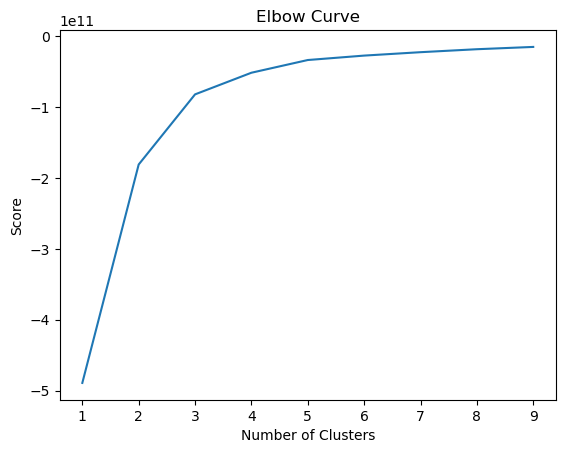

In [31]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The curve straightens out after three clusters, then three clusters might be considered the optimal choice for my k-means clustering.

### K-means clustering

In [32]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [33]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\Leeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [34]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Leeza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
df.head()

,X2 DEP_DELAY,Y ARR_DELAY,X3 DISTANCE,X4 DELAY_DUE_WEATHER,X5 latitude,X6 longitude,clusters
0,0.0,0.0,801.0,0.0,32.896519,-97.046524,2
1,0.0,0.0,801.0,0.0,41.978081,-87.909180,2
2,0.0,0.0,4962.0,0.0,21.320404,-157.917313,1
3,0.0,0.0,1846.0,0.0,41.978081,-87.909180,1
4,0.0,0.0,2454.0,0.0,40.689064,-74.177254,1


In [36]:
df['clusters'].value_counts()

0    846017
2    557348
1    148477
Name: clusters, dtype: int64

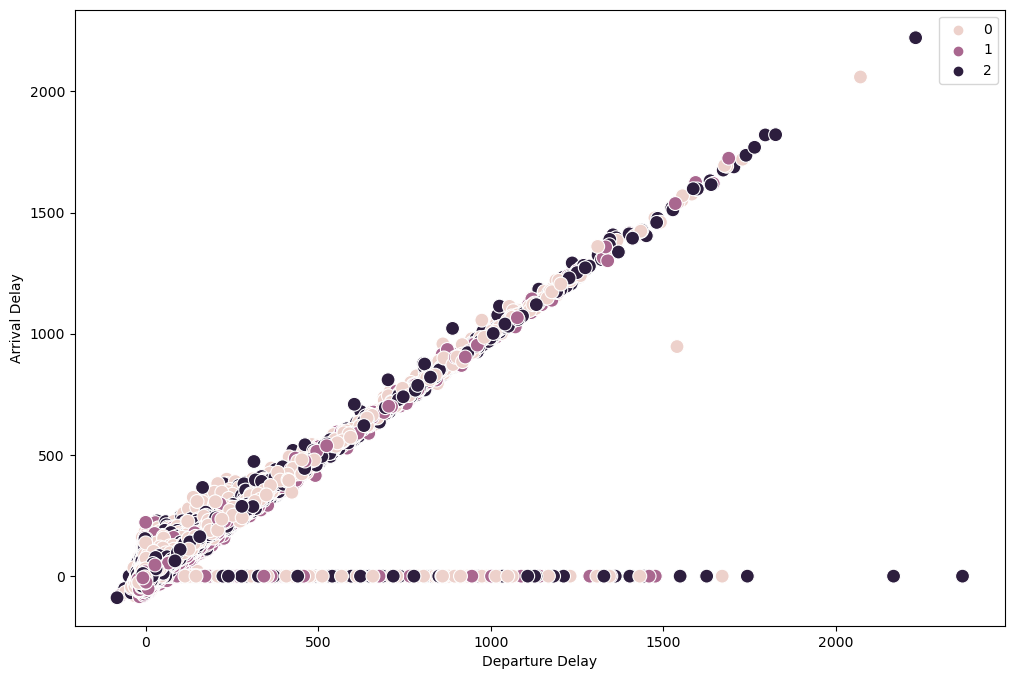

In [37]:
# Plot the clusters for the "ARR_DELAY" and "DEP_DELAY" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['X2 DEP_DELAY'], y=df['Y ARR_DELAY'], hue=kmeans.labels_, s=100) 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Departure Delay') # Label x-axis.
plt.ylabel('Arrival Delay') # Label y-axis.
plt.show()

#### The fact that you see a clear linear slope indicates that changes in one variable ( "dep_delay") are associated with systematic changes in the other variable ("arr_delay") along that slope and it indicates a strong relationship between them.

#### However,  horizontal line just above the x-axis (y = 0) in the scatterplot suggests that for those data points, the "arr_delay" remains unchanged (zero delay) despite variations in "dep_delay." 

#### Linear slope of the scatterplot has many data points from Cluster 0 closely gathered at the beginning of the slope indicates a specific behavior or condition associated with lower values of "dep_delay" or "arr_delay" within Cluster 0. Clusters 1 and 2, being uniformly distributed along the slope, may represent different patterns or conditions that are not as concentrated as in Cluster 0. They might have more varied behavior across the range of "dep_delay" and "arr_delay."

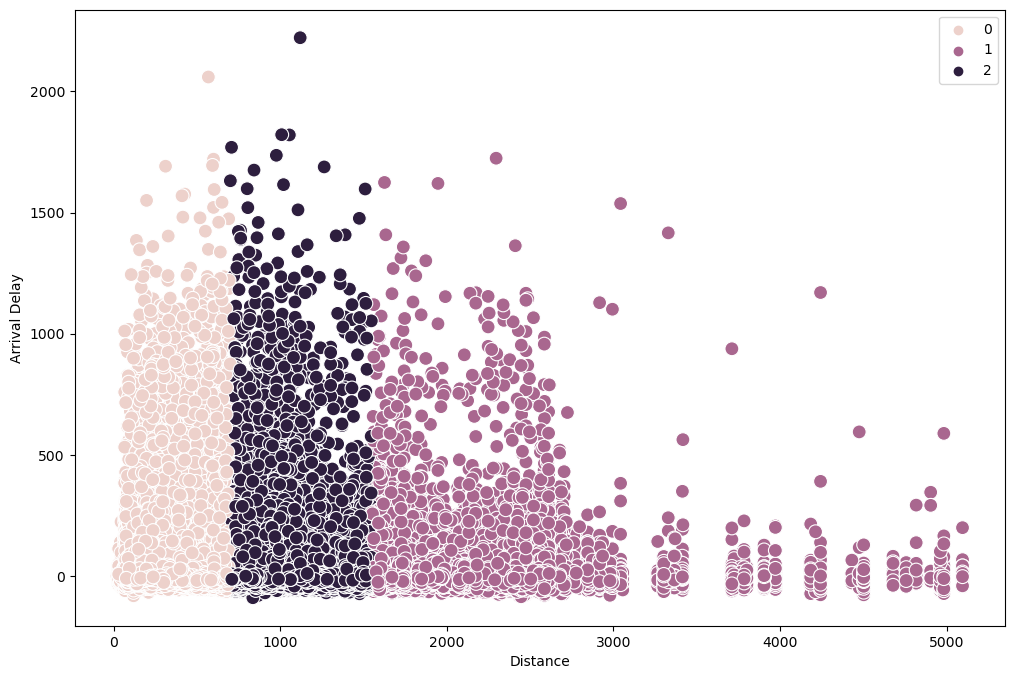

In [38]:
# Plot the clusters for the "ARR_DELAY" and "Distance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['X3 DISTANCE'], y=df['Y ARR_DELAY'], hue=kmeans.labels_, s=100) 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance') # Label x-axis.
plt.ylabel('Arrival Delay') # Label y-axis.
plt.show()

#### The fact that data points from each cluster are gathered in their own sections could indicate that flights in each cluster have different typical distances.Within each cluster, there might be a trend where flights with similar distances tend to have similar arrival delays. 

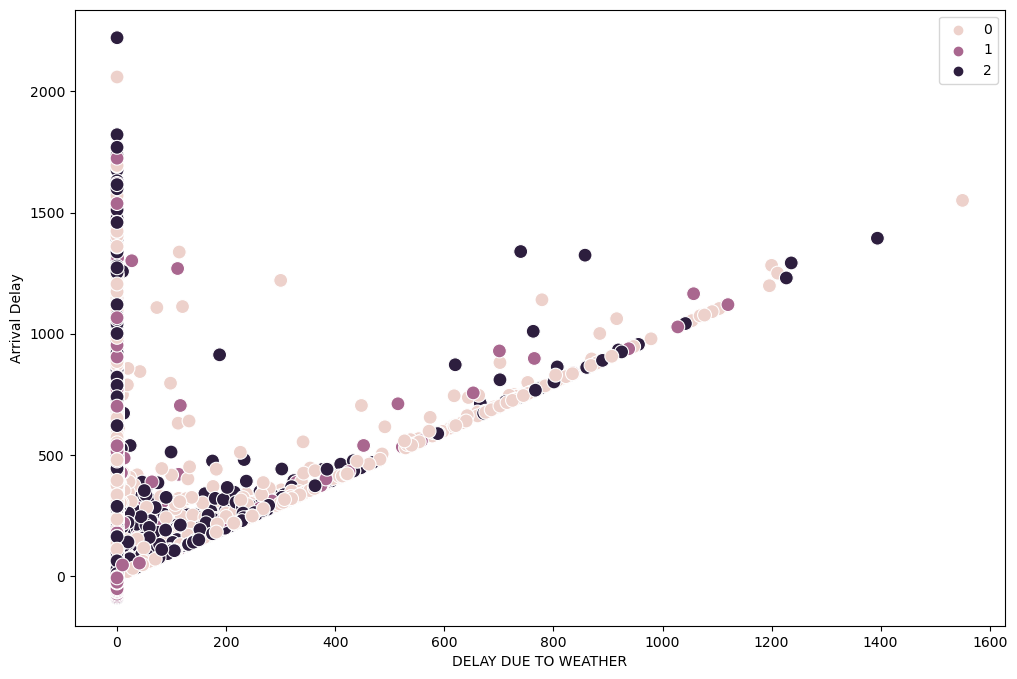

In [39]:
# Plot the clusters for the "ARR_DELAY" and " DELAY_DUE_WEATHER" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['X4 DELAY_DUE_WEATHER'], y=df['Y ARR_DELAY'], hue=kmeans.labels_, s=100) 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('DELAY DUE TO WEATHER') # Label x-axis.
plt.ylabel('Arrival Delay') # Label y-axis.
plt.show()

#### The linear slope indicates a positive relationship between delay_due_weather and arr_delay. As the delay due to weather increases,  arrival delay increases.
#### The vertical line at x=0 suggests that there are instances where the delay_due_weather is 0 and yet there are non-zero arrival delays. This could be due to other factors influencing arrival delays, not related to weather.
#### The presence of clusters (0 and 2) near the beginning of the slope indicates that there are specific patterns or behavior within these clusters. It could mean that flights with certain characteristics (represented by clusters 0 and 2) exhibit similar trends in the relationship between delay due to weather and arrival delay.

In [41]:
df.groupby('clusters').agg({'X2 DEP_DELAY':['mean', 'median'], 
                         'X3 DISTANCE':['mean', 'median'], 
                         'X4 DELAY_DUE_WEATHER':['mean', 'median'],
                          'Y ARR_DELAY':['mean', 'median']})

X2 DEP_DELAY         X3 DISTANCE         X4 DELAY_DUE_WEATHER         \
                 mean median         mean  median                 mean median   
clusters                                                                        
0            4.902974    0.0   396.977570   395.0             0.382791    0.0   
1            7.743064    0.0  2082.305664  1995.0             0.299353    0.0   
2            6.327157    0.0  1014.916077   980.0             0.348366    0.0   

         Y ARR_DELAY         
                mean median  
clusters                     
0           1.750595    0.0  
1           2.034160    0.0  
2           2.746602    0.0

#### These clusters represent different flight profiles based on departure delay, arrival delay, distance, and delay due to weather, providing insights into the characteristics of flights within each group.